# Project 2 - HR Attrition

# Problem Statement: Predicting Employee Attrition
 Context: The dataset given shows that the employee attrition (turnover) is a significant concern and we need to uncover the factors that lead to employee attrition and check for patters if any. High attrition rates can affect company performance, increase hiring and training costs, and lower employee morale. Therefore, understanding and predicting which employees are at risk of leaving the company can help HR departments take proactive measures to retain valuable employees and reduce turnover.
 The goal of this project is to develop a predictive model that can accurately forecast whether an employee will leave the company based on various features related to the employee's demographics, job role, job satisfaction, and other factors. By analysing these factors, the model aims to identify key drivers of employee attrition.


In [612]:
import pandas as pd


In [613]:
df = pd.read_csv("D://WA_Fn-UseC_-HR-Employee-Attrition.csv")


In [614]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Cleaning the dataset

In [615]:
df.isna().sum() #no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [616]:
df["EmployeeNumber"].nunique()


1470

In [617]:
df.drop({'StandardHours','Over18','EmployeeCount','EmployeeNumber'},axis=1,inplace=True)

In [618]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# Encoding the categorical values

In [619]:
from sklearn.preprocessing import LabelEncoder

In [620]:
le=LabelEncoder()

In [621]:
df['Attrition'] = le.fit_transform(df['Attrition'])

In [622]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [623]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [624]:
df['Department'] = le.fit_transform(df['Department'])

In [625]:
df['EducationField'] = le.fit_transform(df['EducationField'])

In [626]:
df['Gender'] = le.fit_transform(df['Gender'])

In [627]:
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])

In [628]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int32 
 2   BusinessTravel            1470 non-null   int32 
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   int32 
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   int32 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   int32 
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [630]:
df['JobRole'] = le.fit_transform(df['JobRole'])

In [631]:
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [632]:
df['OverTime']= le.fit_transform(df['OverTime'])

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

# Scaling the continuous variables values 

In [634]:
from sklearn.preprocessing import StandardScaler

In [635]:
ss = StandardScaler()

In [636]:
df['DailyRate']=ss.fit_transform(df[['DailyRate']])

In [637]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,0.742527,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,-1.297775,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7


In [638]:
df['Age']=ss.fit_transform(df[['Age']])

In [639]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,1.322365,0,1,-1.297775,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,0.008343,1,2,1.414363,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,-0.429664,0,1,1.461466,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,-1.086676,0,2,-0.524295,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [640]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,1.322365,0,1,-1.297775,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,0.008343,1,2,1.414363,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,-0.429664,0,1,1.461466,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,-1.086676,0,2,-0.524295,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [641]:
df['DistanceFromHome']=ss.fit_transform(df[['DistanceFromHome']])
df['Education']=ss.fit_transform(df[['Education']])
df['EducationField']=ss.fit_transform(df[['EducationField']])
df['EnvironmentSatisfaction']=ss.fit_transform(df[['EnvironmentSatisfaction']])
df['HourlyRate']=ss.fit_transform(df[['HourlyRate']])

In [642]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   Gender                    1470 non-null   int32  
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int32  
 14  JobSatis

In [643]:
df['MonthlyIncome']=ss.fit_transform(df[['MonthlyIncome']])
df['MonthlyRate']=ss.fit_transform(df[['MonthlyRate']])
df['NumCompaniesWorked']=ss.fit_transform(df[['NumCompaniesWorked']])
df['PercentSalaryHike']=ss.fit_transform(df[['PercentSalaryHike']])
df['StockOptionLevel']=ss.fit_transform(df[['StockOptionLevel']])
df['TotalWorkingYears']=ss.fit_transform(df[['TotalWorkingYears']])
df['TrainingTimesLastYear']=ss.fit_transform(df[['TrainingTimesLastYear']])
df['WorkLifeBalance']=ss.fit_transform(df[['WorkLifeBalance']])
df['YearsAtCompany']=ss.fit_transform(df[['YearsAtCompany']])
df['YearsInCurrentRole']=ss.fit_transform(df[['YearsInCurrentRole']])
df['YearsSinceLastPromotion']=ss.fit_transform(df[['YearsSinceLastPromotion']])
df['YearsWithCurrManager']=ss.fit_transform(df[['YearsWithCurrManager']])





In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   int32  
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int32  
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   Gender                    1470 non-null   int32  
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int32  
 14  JobSatis

In [645]:
df.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,-0.937414,-0.660531,0,...,3,1,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,-0.937414,0.254625,1,...,4,4,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,1.316673,1.169781,1,...,3,2,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,-0.937414,1.169781,0,...,3,3,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,0.565311,-1.575686,1,...,3,4,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
5,-0.539166,0,1,0.502054,1,-0.887515,-0.891688,-0.937414,1.169781,1,...,3,3,-0.932014,-0.421642,-0.620189,-1.077862,-0.001333,0.764998,0.252146,0.526188


# Dividing the data into Training and Testing Parts

In [646]:
from sklearn.model_selection import train_test_split

In [647]:
X=df[['Age','BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
    'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
    'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
    'YearsWithCurrManager']]

In [648]:
Y=df['Attrition']

In [649]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y) #70% training part

# Modelling the data in decision tree model

In [650]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [651]:
dt = dtree()

In [652]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [653]:
Y_pred = dt.predict(X_test)

In [654]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [655]:
Y_test

687     0
289     0
481     0
1096    0
178     0
       ..
281     0
494     0
1343    0
180     0
187     0
Name: Attrition, Length: 441, dtype: int32

In [656]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [657]:

print('Decision Tree Classifier')
print("accuracy: ",accuracy_score(Y_test, Y_pred), "precision:",precision_score(Y_test, Y_pred),"recall:", recall_score(Y_test, Y_pred) , "f1_score:", f1_score(Y_test, Y_pred))

Decision Tree Classifier
accuracy:  0.7709750566893424 precision: 0.32142857142857145 recall: 0.38028169014084506 f1_score: 0.34838709677419355


In [658]:
X_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [659]:
import pandas as pd
feature_imp = pd.Series(dt.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

MonthlyIncome               0.118524
HourlyRate                  0.075433
DistanceFromHome            0.070410
OverTime                    0.068648
Age                         0.068292
StockOptionLevel            0.064272
YearsAtCompany              0.062090
DailyRate                   0.057910
JobSatisfaction             0.053426
PercentSalaryHike           0.052061
JobInvolvement              0.033922
Department                  0.028456
NumCompaniesWorked          0.028114
MonthlyRate                 0.025806
Education                   0.024734
TrainingTimesLastYear       0.023435
WorkLifeBalance             0.022418
EnvironmentSatisfaction     0.022348
RelationshipSatisfaction    0.019787
TotalWorkingYears           0.018044
YearsWithCurrManager        0.017938
YearsInCurrentRole          0.014126
JobRole                     0.009913
EducationField              0.006784
MaritalStatus               0.006465
Gender                      0.003591
JobLevel                    0.003053
B

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


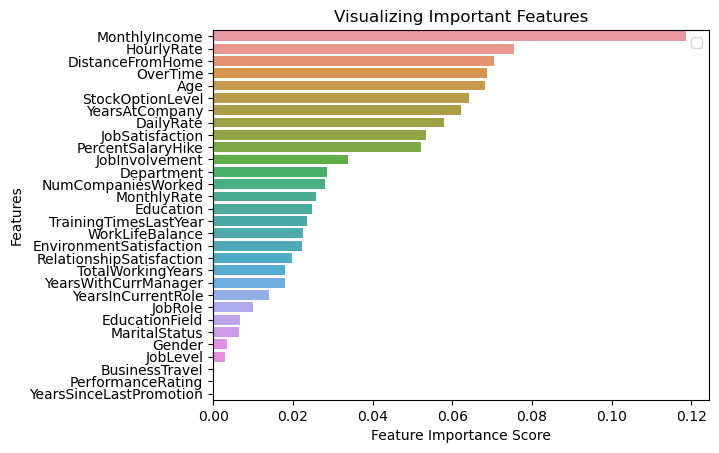

In [660]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

[Text(0.5, 0.875, 'node #0\nStockOptionLevel <= -0.345\ngini = 0.271\nsamples = 1029\nvalue = [863, 166]\nclass = No Attririon'),
 Text(0.25, 0.625, 'node #1\nYearsAtCompany <= -0.899\ngini = 0.38\nsamples = 428\nvalue = [319, 109]\nclass = No Attririon'),
 Text(0.125, 0.375, 'node #2\nAge <= -0.375\ngini = 0.497\nsamples = 69\nvalue = [32, 37]\nclass = Attrition'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'node #31\nOverTime <= 0.5\ngini = 0.321\nsamples = 359\nvalue = [287, 72]\nclass = No Attririon'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'node #130\nMonthlyIncome <= -0.817\ngini = 0.172\nsamples = 601\nvalue = [544, 57]\nclass = No Attririon'),
 Text(0.625, 0.375, 'node #131\nOverTime <= 0.5\ngini = 0.317\nsamples = 96\nvalue = [77, 19]\nclass = No Attririon'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'node #162

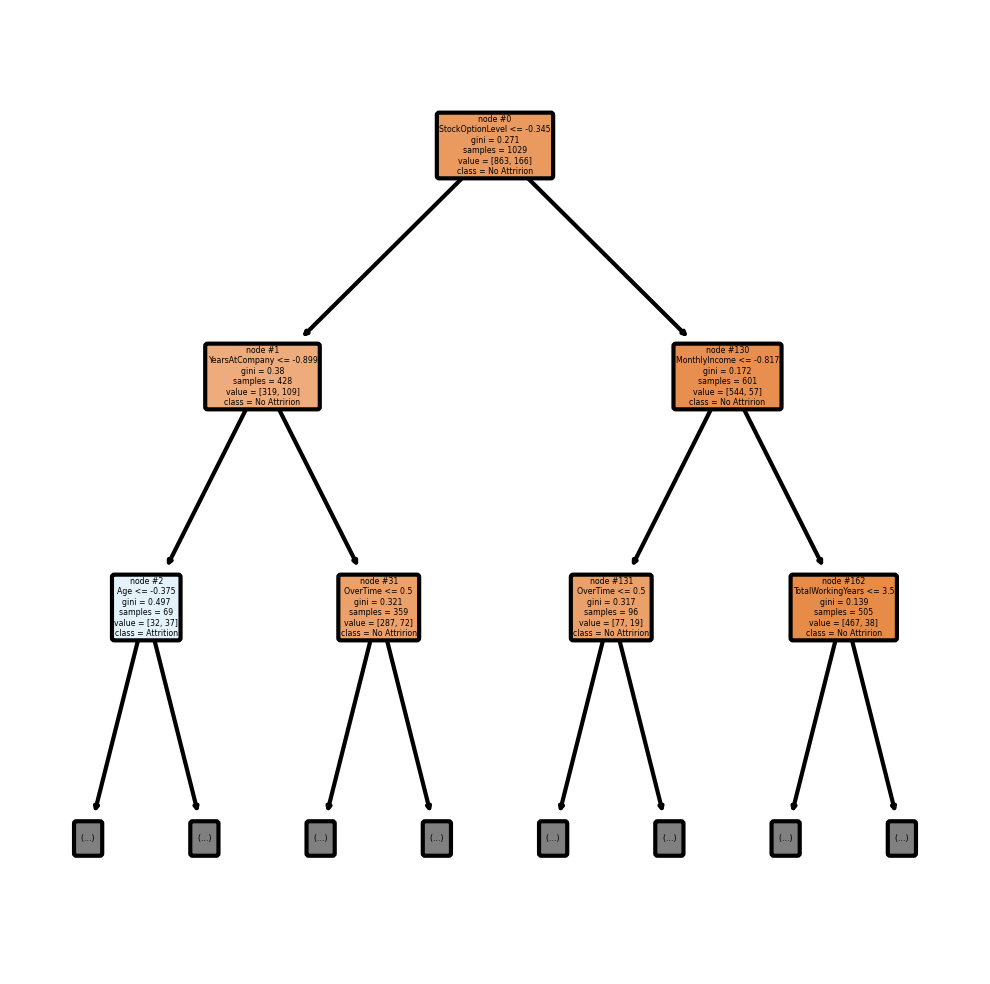

In [661]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dt, max_depth = 2,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
            class_names = ["No Attririon","Attrition"]
              )

# Modelling the data in Catboost Classifier model

In [662]:
from catboost import CatBoostClassifier

In [663]:
cat = CatBoostClassifier()

In [664]:
cat.fit(X_train, Y_train)

# Predict on test set
cat_pred_Y = dt.predict(X_test)

# accuracy
acc_cat = accuracy_score(Y_test, cat_pred_Y)
print("Cat Boosting Classifier accuracy is : {:.2f}".format(acc_cat))

Learning rate set to 0.010429
0:	learn: 0.6856979	total: 4.88ms	remaining: 4.88s
1:	learn: 0.6776676	total: 9.22ms	remaining: 4.6s
2:	learn: 0.6704288	total: 13.2ms	remaining: 4.39s
3:	learn: 0.6635923	total: 17.5ms	remaining: 4.35s
4:	learn: 0.6574921	total: 21.7ms	remaining: 4.31s
5:	learn: 0.6505079	total: 25.5ms	remaining: 4.22s
6:	learn: 0.6443498	total: 30ms	remaining: 4.26s
7:	learn: 0.6372606	total: 34ms	remaining: 4.21s
8:	learn: 0.6300839	total: 38.1ms	remaining: 4.19s
9:	learn: 0.6236576	total: 41.6ms	remaining: 4.12s
10:	learn: 0.6185525	total: 45.1ms	remaining: 4.05s
11:	learn: 0.6139331	total: 47.1ms	remaining: 3.88s
12:	learn: 0.6080629	total: 50.6ms	remaining: 3.84s
13:	learn: 0.6026149	total: 54.4ms	remaining: 3.83s
14:	learn: 0.5969823	total: 57.8ms	remaining: 3.8s
15:	learn: 0.5911407	total: 61.1ms	remaining: 3.76s
16:	learn: 0.5863121	total: 64.5ms	remaining: 3.73s
17:	learn: 0.5812972	total: 68ms	remaining: 3.71s
18:	learn: 0.5765534	total: 71.3ms	remaining: 3.68s


In [665]:
print('Cat Boosting Classifier')
print("accuracy: ",accuracy_score(Y_test, cat_pred_Y), "precision:",precision_score(Y_test, cat_pred_Y),"recall:", recall_score(Y_test, cat_pred_Y) , "f1_score:", f1_score(Y_test, cat_pred_Y))

Cat Boosting Classifier
accuracy:  0.7709750566893424 precision: 0.32142857142857145 recall: 0.38028169014084506 f1_score: 0.34838709677419355


In [666]:
import pandas as pd
feature_imp = pd.Series(cat.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

OverTime                    6.790348
JobSatisfaction             5.977019
StockOptionLevel            5.515354
MonthlyIncome               5.217560
EnvironmentSatisfaction     5.024124
DistanceFromHome            4.423198
NumCompaniesWorked          4.162894
Age                         4.156243
HourlyRate                  4.010224
RelationshipSatisfaction    3.614348
JobLevel                    3.441067
JobInvolvement              3.416007
WorkLifeBalance             3.373440
DailyRate                   3.230531
JobRole                     3.194800
PercentSalaryHike           3.178100
MaritalStatus               3.127939
MonthlyRate                 3.030804
YearsAtCompany              2.811957
EducationField              2.805159
BusinessTravel              2.641975
YearsWithCurrManager        2.637895
TotalWorkingYears           2.635841
YearsInCurrentRole          2.102535
TrainingTimesLastYear       2.020323
Department                  2.001776
Gender                      1.897706
E

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


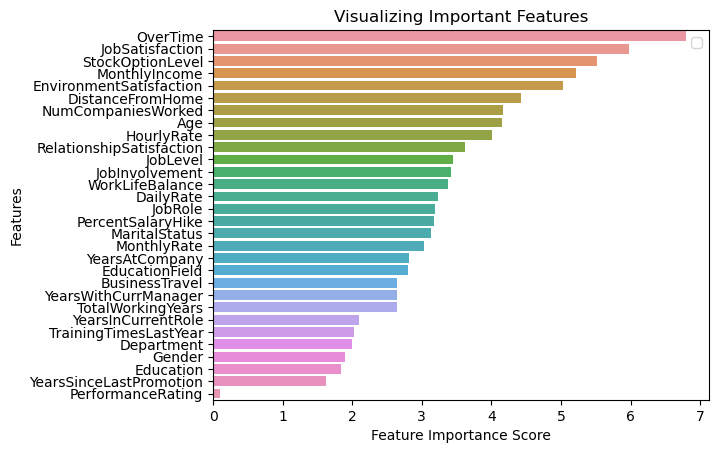

In [667]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Using a new record to predict if the employee will have attrition

In [668]:
new_data = pd.read_csv("D:\ATTRITIAON PEDICTION DATASET.csv")

In [669]:
new_data

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,1,1373,2,2,2,0,4,1,92,...,3,2,0,7,3,3,0,0,0,0
1,34,2,419,2,7,4,1,1,0,53,...,3,3,0,13,4,3,12,6,2,11
2,26,3,1357,1,25,3,2,1,1,48,...,3,3,0,1,2,2,1,0,0,1
3,36,2,318,2,9,3,3,4,0,79,...,3,1,1,2,0,2,1,0,0,0
4,50,0,410,0,28,3,4,4,0,39,...,3,2,1,20,3,3,3,2,2,0


In [670]:
dt.predict(new_data)

array([1, 1, 0, 0, 1])

In [671]:
cat.predict(new_data)

array([0, 0, 0, 0, 0], dtype=int64)

# Interpretation

# Performance Metrics
Accuracy: Measures the proportion of true results (both true positives and true negatives) among the total number of cases examined.
Precision: Measures the proportion of true positives among all positive results predicted by the classifier (how many selected items are relevant).
Recall: Measures the proportion of true positives among all actual positives (how many relevant items are selected).
F1 Score: Harmonic mean of precision and recall, providing a single measure of a test's accuracy.
# Interpretation of Metrics
Accuracy: 0.7709750566893424
Both classifiers correctly predict 77.10% of the cases.
Precision: 0.32142857142857145
Both classifiers have a precision of 32.14%. This means that out of all the positive predictions made by the model, 32.14% are actually positive.
Recall: 0.38028169014084506
Both classifiers have a recall of 38.03%. This means that the model correctly identifies 38.03% of all the actual positives.
F1 Score: 0.34838709677419355
Both classifiers have an F1 score of 34.84%. This value provides a balance between precision and recall.
# Performance Analysis
Decision Tree Classifier
Accuracy: 77.10%
Precision: 32.14%
Recall: 38.03%
F1 Score: 34.84%
Cat Boosting Classifier
Accuracy: 77.10%
Precision: 32.14%
Recall: 38.03%
F1 Score: 34.84%
# Comparison
Based on the provided metrics, both the Decision Tree Classifier and Cat Boosting Classifier have identical performance in terms of accuracy, precision, recall, and F1 score.

Accuracy: Both models correctly predict approximately 77.10% of the instances, which is a decent accuracy level but indicates there is still room for improvement.
Precision: Both models have a precision of 32.14%, suggesting that about one-third of the positive predictions are correct. This might indicate a moderate level of false positives.
Recall: Both models have a recall of 38.03%, meaning they are identifying a little over a third of the actual positive cases. This suggests there are many false negatives.
F1 Score: The F1 score of 34.84% indicates a moderate balance between precision and recall, but the overall performance can be improved.
# Summary
Both the Decision Tree Classifier and Cat Boosting Classifier perform identically based on the provided metrics.